In [ ]:
import os
import sys
import numpy as np
from pathlib import Path
from natsort import natsorted
import cv2

from api_tem.tem_client import MicroscopeClient
from api_cam.cam import MPX3
from cred_serial import serial_cred

In [ ]:
tem = MicroscopeClient('tem')
cam = MPX3()

In [ ]:
exp = serial_cred(
    cam=cam,
    tem_general=tem,
    tem_stage=tem,
    tem_lens=tem,
    angle_limition=(-60, 60), 
    # speed_index=2, # 0 for 10deg./s, 1 for 2 deg./s, 2 for 1 deg./s, 3 4 
    speed_f=6, # 6 for 5deg./s
    exposure=0.05,
    root_path='/media/asi/Junyi_SSD/Cinchonine',
    brightness= 46000 
    )


In [ ]:
exp.calibrate_lens()

In [ ]:
# pick positions 
x, y, z, a, b = exp.tem_general.getStagePosition()
idx = len(os.listdir(exp.picked_crystal))
img = exp.cam.get_one_image()
cv2.imwrite(str(exp.picked_crystal/f'{idx+1:04}_{int(x)}_{int(y)}_{int(z)}.jpg'), img)
print(f"Position #{idx+1}:  {x:0f} {y:0f} has been saved")

In [ ]:
# possitions = np.loadtxt(exp.root_path/'positions.txt')
exp.run_serial(name='Crystal', number=1, positions = 'positions.txt')

current work in: Crystal_0028
Starting rotate and record ... 
    Initializing TEM ...
    Initializing CAM ...
    Start stage rotating...
    Stop stage moving
Folder: Crystal_0028
Finding crystal path
Load 289 images
remove images: []
Segment done
Save marked images done

Start CRED ...
    stage will rotate from -34.3 to 33.8 in speed 5.045999999999999 deg./s
    Initializing TEM for CRED ...
    Initializing CAM ...
    Ready to start
    Stage start rotating...
    Camrea start recording...    Crystal tracking  ...



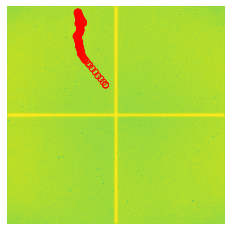

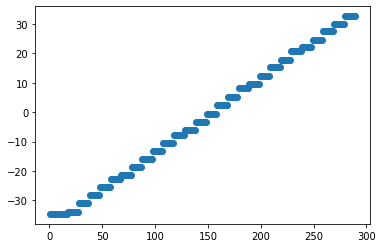

In [19]:
exp.run_single( name='Crystal', number=1)